In [80]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")
import pandasql as psql

In [81]:
# display all the columns in the dataset
pd.set_option("display.max_columns",None)

In [82]:
#  read the file

loan=pd.read_csv(r"C:\Users\Dlc\Downloads\loan_data (1).csv",header=0)

# create a backup file

loan2=loan.copy()

In [83]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [84]:
loan.duplicated().any()

False

In [85]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [86]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [87]:
loan=loan.rename(columns={'not.fully.paid':'NFPaid'},inplace=False)

In [88]:
loan=loan.rename(columns={'credit.policy':'CreditPolicy'},inplace=False)

In [89]:
loan=loan.rename(columns={'int.rate':'IntRate'},inplace=False)

In [90]:
loan.columns=loan.columns.str.replace(".","_")

In [91]:
loan

,CreditPolicy,purpose,IntRate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [92]:
# count the target or dependent variable by '0' & '1' and their proportion
# (>=10):1 the the data is inbalance data
NFPaid=loan.NFPaid.value_counts()
print("class 0",NFPaid[0])
print("class 1",NFPaid[1])
print("proportion:",round(NFPaid[0]/NFPaid[1],2),": 1")
print("Total bank records :",len(loan))

class 0 8045
class 1 1533
proportion: 5.25 : 1
Total bank records : 9578


In [93]:
loan.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [94]:
# label encoder  to handle categorical data

from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
loan['purpose']=l.fit_transform(loan[['purpose']])

In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditPolicy       9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   IntRate            9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  NFPaid             9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


In [96]:
IndepVar=[]
for col in loan.columns:
    if col != 'NFPaid':
        IndepVar.append(col)
TarVar='NFPaid'
x=loan[IndepVar]
y=loan[TarVar]

In [97]:
x.head()

,CreditPolicy,purpose,IntRate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: NFPaid, dtype: int64

In [99]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6704, 13), (2874, 13), (6704,), (2874,))

In [100]:
# identify the variables which ar suppose o nomalise the values

cols=['IntRate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util']

In [101]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

# fit_transform(). It will calculate the mean(μ)and standard deviation(σ) of the feature
#F at a time it will transform the data points of the feature F.
x_train[cols]=mmscaler.fit_transform(x_train[cols])
#x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
#x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [102]:
# to build decision tree model

from sklearn.ensemble import RandomForestClassifier

#create an object for the dataset 

modelRF=RandomForestClassifier()

# train the model with the train dataset

modelRF.fit(x_train,y_train)


#predict the model with test dataset

y_pred=modelRF.predict(x_test)
y_pred_prob=modelRF.predict_proba(x_test)

In [103]:
# to display the alorithm hyper parameters

params=modelRF.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [104]:
# 'Confusion matrix' and 'classification report' in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Actual values
actual = y_test
# Predicted values
predicted = y_pred
# Confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)
# Outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Confusion matrix : 
 [[   5  463]
 [  18 2388]]
Outcome values : 
 5 463 18 2388


Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.01      0.02       468
           0       0.84      0.99      0.91      2406

    accuracy                           0.83      2874
   macro avg       0.53      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

Accuracy : 83.3 %
Precision : 21.7 %
Recall : 1.1 %
F1 Score : 0.02
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.2 %
MCC : 0.013
roc_auc_score: 0.502


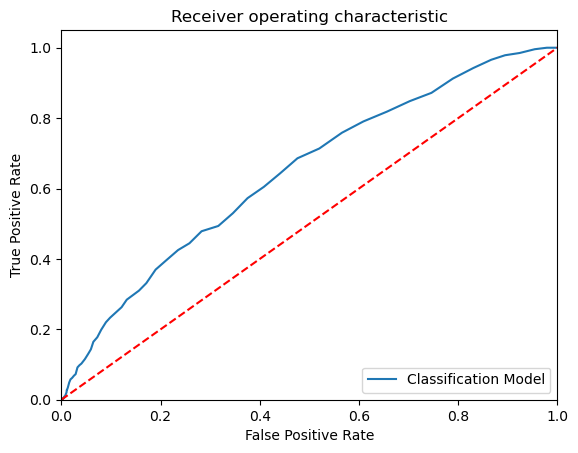

-----------------------------------------------------------------------------------------------------


In [105]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, modelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [77]:
Results = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = loan.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,CreditPolicy,purpose,IntRate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,NFPaid,NFPaid_A,NFPaid_P
5775,1,2,0.1287,319.52,10.757903,12.28,697,2855.0,6696,47.8,1,1,0,0,0,0
3078,1,4,0.0963,80.24,10.491274,22.10,717,3990.0,2307,46.1,0,0,0,0,0,0
5438,1,2,0.1253,324.63,11.156251,9.89,707,7083.0,24427,45.6,0,0,0,0,0,0
519,1,2,0.1071,195.61,10.385543,11.12,687,4079.0,0,0.0,1,0,0,0,0,0
9252,0,3,0.1287,100.90,9.629051,13.58,712,4891.0,0,62.1,7,0,0,1,1,0


In [106]:
# to build decision tree model

from sklearn.tree import DecisionTreeClassifier

#create an object for the dataset 

model=DecisionTreeClassifier()

# train the model with the train dataset

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)

Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.01      0.02       468
           0       0.84      0.99      0.91      2406

    accuracy                           0.83      2874
   macro avg       0.53      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

Accuracy : 83.3 %
Precision : 21.7 %
Recall : 1.1 %
F1 Score : 0.02
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.2 %
MCC : 0.013
roc_auc_score: 0.502


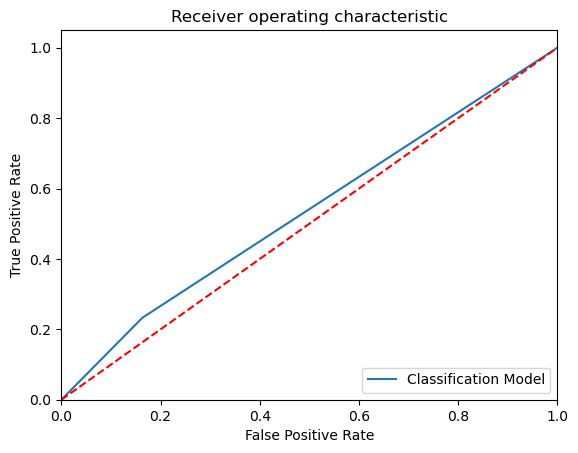

-----------------------------------------------------------------------------------------------------


In [107]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [108]:
Results = pd.DataFrame({'CreditCard_A':y_test, 'CreditCard_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = loan.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,CreditPolicy,purpose,IntRate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,NFPaid,CreditCard_A,CreditCard_P
7247,1,2,0.1385,682.08,11.532728,23.45,712,7921.041667,37642,93.9,1,0,0,0,0,1
1722,1,1,0.1189,248.73,10.038018,16.89,717,8100.041667,555,23.1,0,0,0,0,0,0
2363,1,2,0.1442,481.36,11.156193,21.21,692,5730.041667,40125,92.0,1,0,0,0,0,1
1180,1,1,0.1103,147.39,10.757903,20.81,707,4350.000000,25469,98.5,1,0,0,0,0,0
7245,1,2,0.0788,281.53,10.778956,10.22,737,4200.041667,9874,54.9,1,0,0,0,0,0


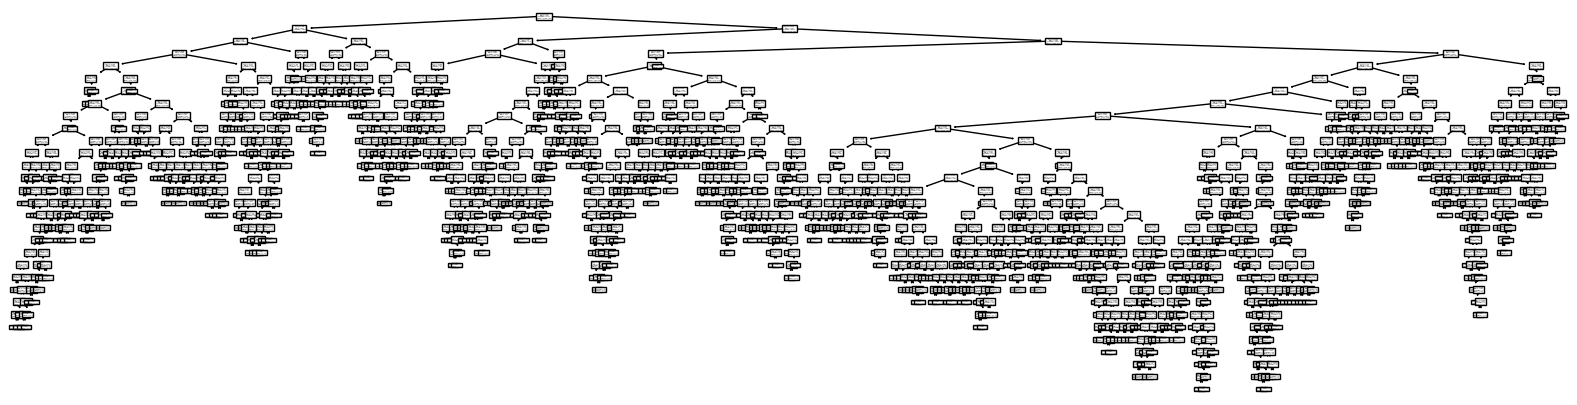

In [109]:
# plot the decision tree

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))

tree.plot_tree(model);

In [110]:
# to build logistic Regression model

from sklearn.linear_model import LogisticRegression

#create an object for the dataset 

model=LogisticRegression()

# train the model with the train dataset

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred_prob=model.predict_proba(x_test)

Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.01      0.02       468
           0       0.84      0.99      0.91      2406

    accuracy                           0.83      2874
   macro avg       0.53      0.50      0.46      2874
weighted avg       0.74      0.83      0.76      2874

Accuracy : 83.3 %
Precision : 21.7 %
Recall : 1.1 %
F1 Score : 0.02
Specificity or True Negative Rate : 99.3 %
Balanced Accuracy : 50.2 %
MCC : 0.013
roc_auc_score: 0.502


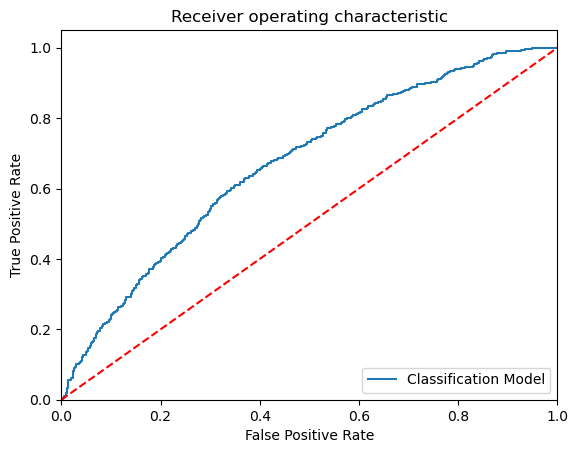

-----------------------------------------------------------------------------------------------------


In [111]:
# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, model.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [113]:
Results = pd.DataFrame({'NFPaid_A':y_test, 'NFPaid_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = loan.merge(Results, left_index=True, right_index=True)

# Display 5 records randomly

ResultsFinal.sample(5)

,CreditPolicy,purpose,IntRate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,NFPaid,NFPaid_A,NFPaid_P
938,1,0,0.1103,229.28,10.373491,0.38,702,9929.958333,10,0.4,0,3,0,0,0,0
3510,1,0,0.1189,132.66,9.546813,8.23,697,2100.000000,3347,79.7,1,0,0,0,0,0
5499,1,0,0.1287,840.83,13.710150,1.16,747,4890.000000,30706,44.0,1,0,0,0,0,0
4250,1,2,0.1253,411.64,10.348173,22.12,702,2280.000000,14537,77.3,0,0,0,0,0,0
561,1,2,0.1292,213.72,11.294956,20.15,677,8520.041667,22247,93.1,1,0,0,0,0,0
